[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/13yALZvNABQ30wZBowOlI30j2zQ_Otu_f?usp=sharing)

# Clustering and PCA on wine Dataset

In [ ]:
import pandas as pd # Allow us to work with CSV files
import numpy as np # Allow us to work with arrays
import warnings
warnings.filterwarnings('ignore') # Allow to disable Python warnings
from sklearn import cluster, metrics # Allow us to perform K-means Clustering and Metrics
import matplotlib.pyplot as plt # Allow us to customize scatterplots
import matplotlib.colors as mcolors # Allow us create colormap objects from a list of colors

In [ ]:
# Step 1: Loading the "wine.data.csv" file

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None) # Read a CSV file from internet that does not have a header
 
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 
                   'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] # Assign custom names to the columns of the wine dataset

print('Wine dataset (truncated)')
display(df_wine)      # Print the wine dataset (truncated)

# If the Wine dataset is temporarily unavailable from the UCI machine learning repository, uncomment the following line to load the dataset from a local path:
#df_wine = pd.read_csv('wine.data', header=None)
#df_wine.to_csv('WindeData.csv')

# .columns     This function is used to rename columns of a dataframe given. 

Wine dataset (truncated)


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Task 1: Check the counts of each wine class

In [ ]:
# Get unique values of the column "class label"

wine_class_counts = df_wine['Class label'].value_counts().rename_axis('Class Label').reset_index(name='Total Count')  # Count unique values of column "Class label"
print(wine_class_counts) # Table showing all existing values for each class label.

print('''\nAs shown in the table above, it can be concluded that:\n
• There are 3 different wine classes (1, 2 & 3)
• Class 2 has 71 values, then class 1 has 59 values, and finally class 3 has 48 values
''')

# value_counts()      This function is used to count unique values of a Column or entire dataset

   Class Label  Total Count
0            2           71
1            1           59
2            3           48

As shown in the table above, it can be concluded that:

• There are 3 different wine classes (1, 2 & 3)
• Class 2 has 71 values, then class 1 has 59 values, and finally class 3 has 48 values



In [ ]:
# Fetch data into x and y variables (Part 1)

wine_columnslist = df_wine.columns.to_list() # Get the names of the columns of the wine dataset

X = wine_columnslist[2:14] # This feature variables include everything except the target variable ("Class label")
print ('''These are the feature variables (X):
%s\n''' %(X)) # Covariates (Independent Variables)(input)

Y = wine_columnslist[:1] # This target variable includes only the first element of the list ("Class label")
print ('''This is the target variable (Y):
%s\n''' %(Y)) # Label or class (Dependent Variable)(output)

# .columns.to_lit()    This function is used to convert the name of the columns into a list

These are the feature variables (X):
['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

This is the target variable (Y):
['Class label']



In [ ]:
# Fetch data into x and y variables (Part 2)

# Transfering the data into 2 numpy arrays
np.set_printoptions(threshold=np.inf, precision=3, suppress=True, linewidth=120) # Print all the values of an array as a pretty table (all values in one row)

x = df_wine.loc[:, df_wine.columns != 'Class label'].to_numpy() # This array contains all the feature variable values.
y = df_wine.loc[:, df_wine.columns == 'Class label'].to_numpy() # This array contains ONLY the target variable values.
print('\n'+'\033[1m'+'Array of feature variables:'+'\033[0m', x.shape) 
print(x) # Output: All possible elements of the array. (This includes everything except the values of the target variable ("Class label")

np.set_printoptions(threshold=np.inf, precision=0, suppress=True, linewidth=5) # Print all the values of an array vertically (one value in one row) 
print('\n'+'\033[1m'+'Array of target variable:'+'\033[0m', y.shape)
print(y) # Output: All possible elements of the array. (This includes only values of "Class Label" feature from the wine dataset)

# Code '\033[1m' and '\033[0m' allow to print a string in bold.
# .shape         This function is used to get the current shape of an array
# .to_numpy()    This function is used to covert a dataframe into a numpy array. 


Array of feature variables: (178, 13)
[[  14.23     1.71     2.43    15.6    127.       2.8      3.06     0.28     2.29     5.64     1.04     3.92  1065.   ]
 [  13.2      1.78     2.14    11.2    100.       2.65     2.76     0.26     1.28     4.38     1.05     3.4   1050.   ]
 [  13.16     2.36     2.67    18.6    101.       2.8      3.24     0.3      2.81     5.68     1.03     3.17  1185.   ]
 [  14.37     1.95     2.5     16.8    113.       3.85     3.49     0.24     2.18     7.8      0.86     3.45  1480.   ]
 [  13.24     2.59     2.87    21.     118.       2.8      2.69     0.39     1.82     4.32     1.04     2.93   735.   ]
 [  14.2      1.76     2.45    15.2    112.       3.27     3.39     0.34     1.97     6.75     1.05     2.85  1450.   ]
 [  14.39     1.87     2.45    14.6     96.       2.5      2.52     0.3      1.98     5.25     1.02     3.58  1290.   ]
 [  14.06     2.15     2.61    17.6    121.       2.6      2.51     0.31     1.25     5.05     1.06     3.58  1295.   ]
 

## Task 2: Cluster the data using K Means Algorithm

In [ ]:
# Clustering using K Means Algorithm

np.set_printoptions(threshold=np.inf, precision=3, suppress=True, linewidth=120) # Print all the values of an array as a pretty table (all values in one row)

# Creating the K-means object with the specified parameters:
km_model = cluster.KMeans(n_clusters=3, random_state=42)

# n_clusters        This parameter is used to set the number of clusters to form and the number of centroids to generate
#                   In this case, K is equal to 3 because we already know that there are three classes (1,2,3) in our target variable ('Class Label').
# random_state      This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data

# Training the K-means object
km_model.fit(x) # Train the K-means algorithm with the feature variables
km_model.labels_ # Output: Class predictions.

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2], dtype=int32)

## Task 3: Scatter plot the data into 3 classes based on True labels and plot with legends. 


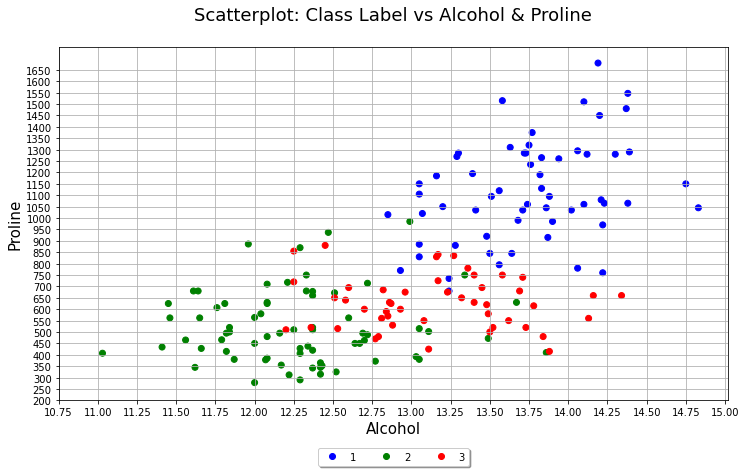

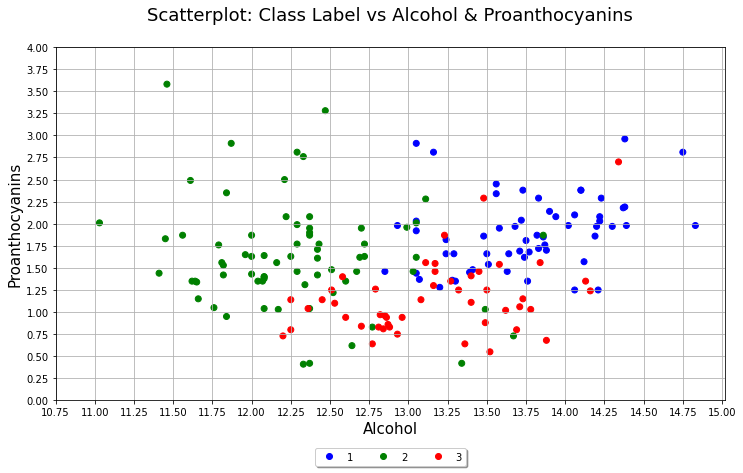

In [ ]:
# Scatterplot: Class Label vs Alcohol & Proline

plt.figure(figsize=(12,6.5))                        # This parameter is used to adjust the size of the scatterplot  
scatter = plt.scatter(df_wine['Alcohol'], df_wine['Proline'], c=df_wine['Class label'], cmap = mcolors.ListedColormap(["Blue", "Green", "Red"])) # Creates a Scatterplot with the specified parameters. 
plt.title('Scatterplot: Class Label vs Alcohol & Proline\n', fontsize=18)    # Add a title to the scatterplot
plt.grid(True)                                                               # Draw a grid in the scatterplot
labels = pd.unique(df_wine['Class label'])                                   # Get the unique values of the column 'Class Label' (1,2,3)
plt.legend(scatter.legend_elements()[0], labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, shadow=True, ncol=3)  # Add a scatterplot legend with the specified parameters
plt.xlabel("Alcohol", fontsize=15)                                           # This X-Axis property allows us to customize the labels of X-axis
plt.ylabel("Proline", fontsize=15)                                           # This Y-Axis property allows us to customize the labels of Y-axis
x_val = [10.75,11,11.25,11.50,11.75,12,12.25,12.50,12.75,
         13,13.25,13.5,13.75,14,14.25,14.5,14.75,15]                        # Customize the label values in X-Axis
y_val = [200,250,300,350,400,450,500,550,600,650,700,750,
         800,850,900,950,1000,1050,1100,1150,1200,1250,
         1300,1350,1400,1450,1500,1550,1600,1650]                           # Customize the label values in Y-Axis
plt.xticks(x_val, fontsize=10)                                              # This X-Axis property allows us to customize the values of the X-Axis labels
plt.yticks(y_val, fontsize=10)                                              # This Y-Axis property allows us to customize the values of the Y-Axis labels
plt.show()                                                                  # Display the current figure that you are working on

print('\n')

# Scatterplot: Class Label vs Alcohol & Proanthocyanins

plt.figure(figsize=(12,6.5))                        # This parameter is used to adjust the size of the scatterplot  
scatter = plt.scatter(df_wine['Alcohol'], df_wine['Proanthocyanins'], c=df_wine['Class label'], cmap = mcolors.ListedColormap(["Blue", "Green", "Red"])) # Creates a Scatterplot with the specified parameters. 
plt.title('Scatterplot: Class Label vs Alcohol & Proanthocyanins\n', fontsize=18)    # Add a title to the scatterplot
plt.grid(True)                                                                       # Draw a grid in the scatterplot
labels = pd.unique(df_wine['Class label'])                                           # Get the unique values of the column 'Class Label' (1,2,3)
plt.legend(scatter.legend_elements()[0], labels, loc='upper center', bbox_to_anchor=(0.5, -0.12), fancybox=True, shadow=True, ncol=3)  # Add a scatterplot legend with the specified parameters
plt.xlabel("Alcohol", fontsize=15)                                           # This X-Axis property allows us to customize the labels of X-axis
plt.ylabel("Proanthocyanins", fontsize=15)                                   # This Y-Axis property allows us to customize the labels of Y-axis
x_val1 = [10.75,11,11.25,11.50,11.75,12,12.25,12.50,12.75,
         13,13.25,13.5,13.75,14,14.25,14.5,14.75,15]                        # Customize the label values in X-Axis
y_val1 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,
          2.75,3,3.25,3.5,3.75,4]                                           # Customize the label values in Y-Axis
plt.xticks(x_val1, fontsize=10)                                             # This X-Axis property allows us to customize the values of the X-Axis labels
plt.yticks(y_val1, fontsize=10)                                             # This Y-Axis property allows us to customize the values of the Y-Axis labels
plt.show()                                                                  # Display the current figure that you are working on

# plt.scatter                This function is used to create a scatterplot
# pd.unique                  This function is used to count unique values of a column or entire dataset.
# loc and bbox_to_anchor     When bbox_to_anchor and loc are used together, the loc argument will inform matplotlib which part of the bounding box of the legend should be place 
#                            at the arguments of bbox_to_anchor. In this case, The first command will put the center of the bounding box at axes coordinates 0.5, -0.12
# ncol                       This parameter is the number of columns that the legend has
# Shadow = True              This parameter is used to draw a shadow behind the legend.
# fancybox = True            This parameter is used to enable the legend as a background.
# cmap                       This parameter is used to color the market points of the scatterplot. cmap is only used if c is an array
# mcolors.ListedColormap     This function is used to create colormap objects from a list of colors. This can be useful when we want to add special colors.


## Task 4: Use cluster model labels to group them in predicted classes

In [ ]:
# Write your code here for task 4


In [ ]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [ ]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Dimensionality reduction: Principal component analysis using scikit-learn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
 

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

AttributeError: ignored

## Task 5: Apply PCA with `n_components=2` on `X_train_std` data and transform test data accordingly

In [ ]:
# Complete this code for task 5
pca = PCA(......)
X_train_pca = pca.fit_transform(......)
X_test_pca = pca.transform(........)

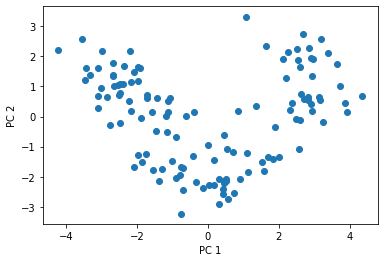

In [ ]:
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

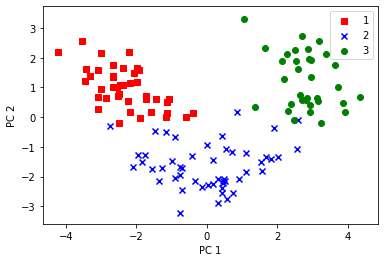

In [ ]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

###  Training logistic regression classifier using the first 2 principal components.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


## Task 6: Apply Logistic Regression on training features and predict test features



In [ ]:
# Task 6: Complete the code below and fill the code for plot in the cell given below:
lr = LogisticRegression()
lr = lr.fit(.............) # Train a Logistic regression model
pred_lab=lr.predict(.......) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

In [ ]:
# Plot the decision region on training features and test labels using classifier you have trained above
plot_decision_regions(................, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)
plt.show()

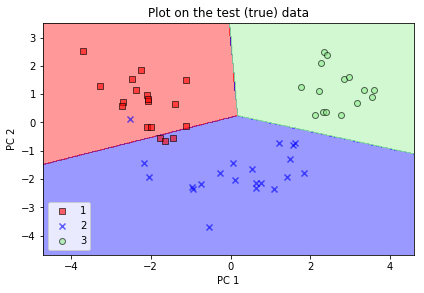

In [ ]:
#  Plot the decision region on test features and true labels using classifier you have trained above
plot_decision_regions(..........., classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

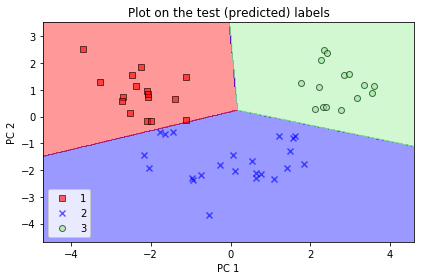

In [ ]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()

## Lab 6: Exercise to be completed

### Task 7: To complete this task, please create a new notebook in Google Colab. 

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:

| S.No      | Categories |
| ----------- | ----------- |
| 1   | under-developing country |
| 2   | developing country       |
| 3   | developed country        |


Note: please justify your reason, why and how you have concluded your answer. 